In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image


from scipy import ndimage as nd

import pypore3d 
from pypore3d import *
from pypore3d.p3dFiltPy import *
# from pypore3d.p3dBlobPy import *
# from pypore3d.p3dSkelPy import *
# from pypore3d.p3dSITKPy import *

import os
 
from poreUtils import *

from scipy.ndimage import distance_transform_edt


In [2]:
# Reading the image 
img_path = 'D:\\sagar\\Data\MD_1264_A2_1_Z3.3mm\\result\\600-900x1000-1300x1600-1900_8bit.raw'

x, y, z = 300, 300, 300

volc = py_p3dReadRaw8(img_path, x, y, z)
# Appying Median filter for removing noise
volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
# convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
vol = swigObjt2uint8Array(volc, x, y, z)       


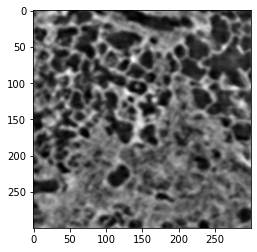

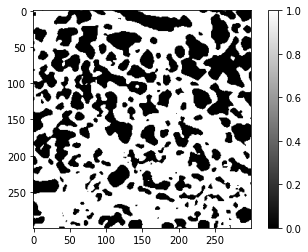

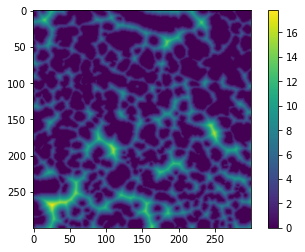

In [3]:
# Distance transform with a slice 
aSlice = vol[150, ...]
plt.imshow(aSlice, cmap='gray')
plt.show()

#Binarization
th_slice = aSlice > 55 
plt.imshow(th_slice, cmap='gray')
plt.colorbar()
plt.show()

# Distance transform 
distance = distance_transform_edt(th_slice)
plt.imshow(distance)
plt.colorbar()
plt.show()

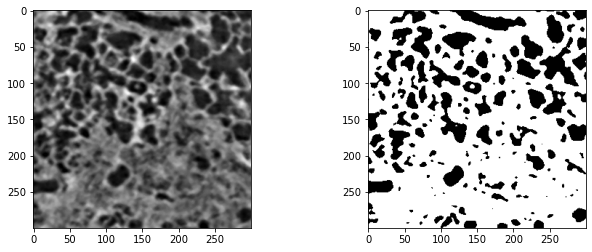

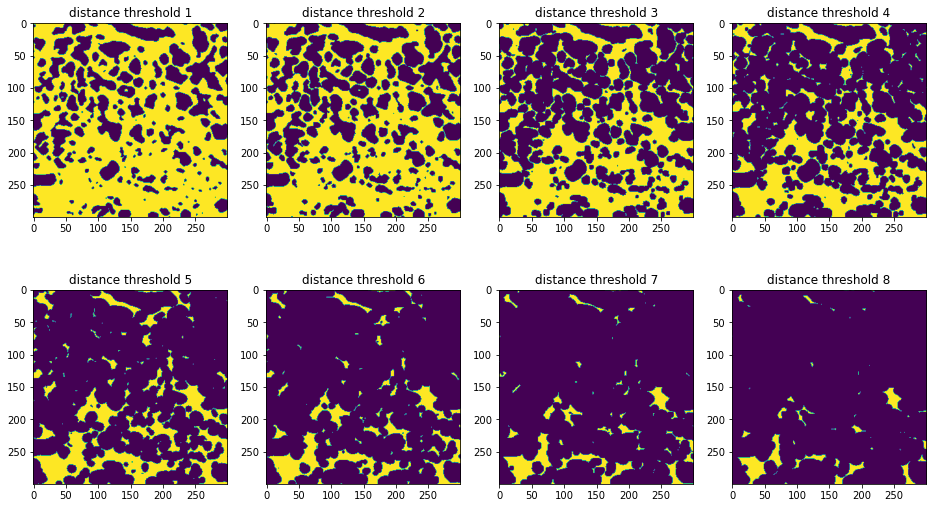

In [4]:
# Distance transform with 3d volume 
th_vol = vol > 40
#th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_vol)



sliceNo = 150

fig, ax = plt.subplots(1,2, figsize=(11,4))
ax[0].imshow(vol[sliceNo, ...], cmap='gray')
ax[1].imshow(th_vol[sliceNo, ...], cmap='gray')
plt.show()

fig, ax = plt.subplots(2,4, figsize=(16,9))

for i in range(4):
    img = dis3d[sliceNo, ...] > 1+i
    ax[0, i].imshow(img,)
    ax[0, i].set_title('distance threshold {}'.format(1+i))

for i in range(4):
    img = dis3d[sliceNo, ...] > 5+i
    ax[1, i].imshow(img,)
    ax[1, i].set_title('distance threshold {}'.format(5+i))

#plt.colorbar()
plt.show()

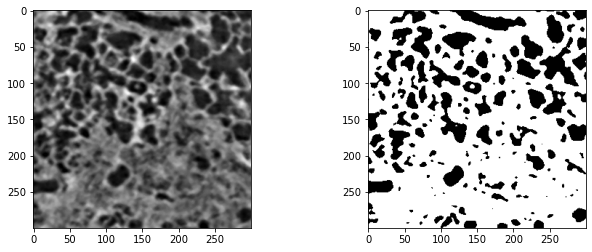

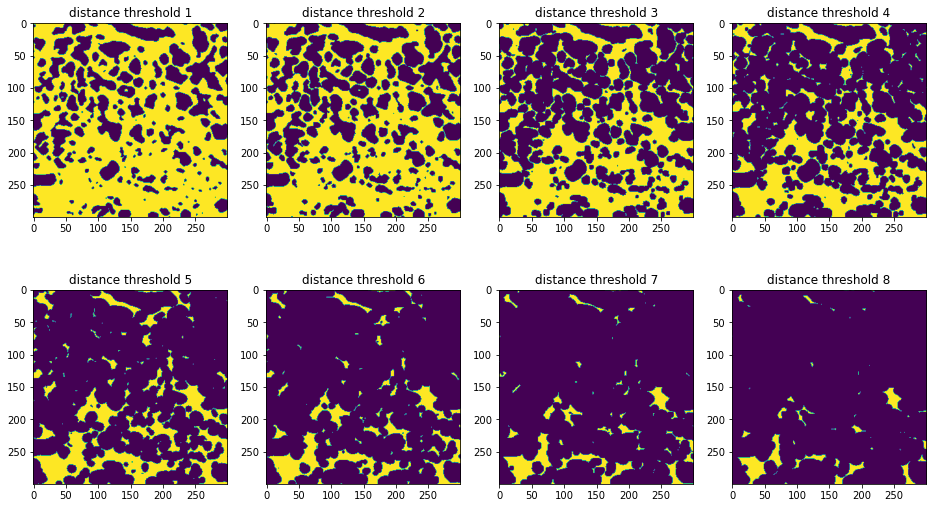

In [91]:
# Distance transform with 3d volume 
th_vol = vol > 40
#th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_vol)

sliceNo = 150

fig, ax = plt.subplots(1,2, figsize=(11,4))
ax[0].imshow(vol[sliceNo, ...], cmap='gray')
ax[1].imshow(th_vol[sliceNo, ...], cmap='gray')
plt.show()

fig, ax = plt.subplots(2,4, figsize=(16,9))

for i in range(4):
    img = dis3d[sliceNo, ...] > 1+i
    ax[0, i].imshow(img,)
    ax[0, i].set_title('distance threshold {}'.format(1+i))

for i in range(4):
    img = dis3d[sliceNo, ...] > 5+i
    ax[1, i].imshow(img,)
    ax[1, i].set_title('distance threshold {}'.format(5+i))

#plt.colorbar()
plt.show()

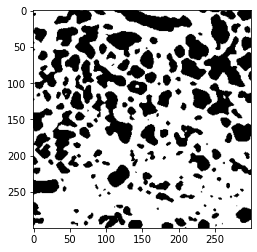

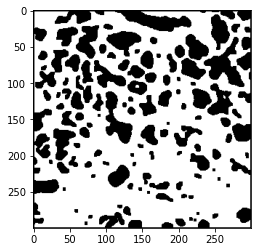

In [92]:
img = dis3d[sliceNo, ...] > 1
mask = nd.binary_closing(img, np.ones((4,4)))


plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()

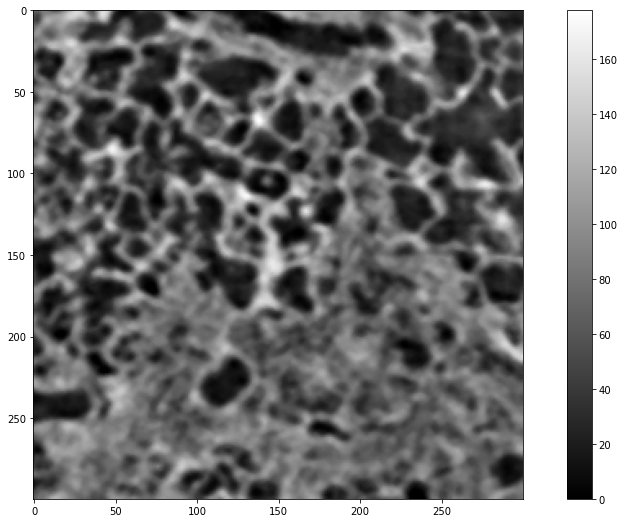

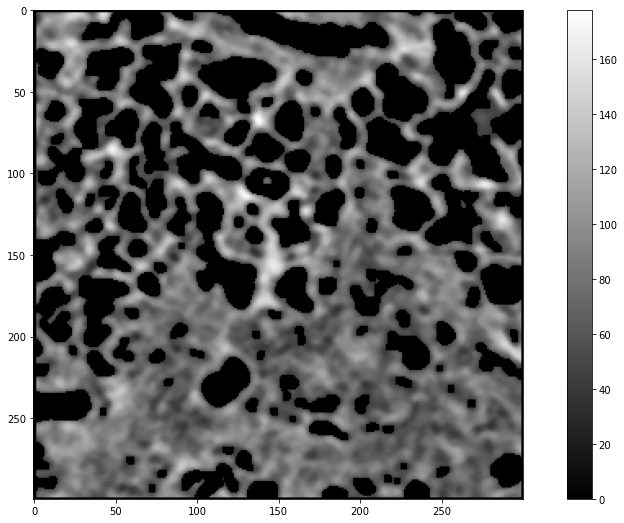

In [155]:
plt.figure(figsize=(16,9))
plt.imshow(vol[sliceNo, ...], cmap=plt.cm.gray)
plt.colorbar()
plt.show()
plt.figure(figsize=(16,9))
plt.imshow(mask*vol[sliceNo, ...], cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [133]:
bg = vol[sliceNo, :, :]
fg = mask*vol[sliceNo, :, :]

simg = fg[100:200, 100:200]
    

In [146]:
mt_mask = np.empty((300,300))
mt_mask[:] = np.nan

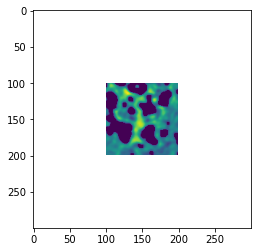

In [148]:
mt_mask[100:200, 100:200] = simg 
plt.imshow(mt_mask)

In [147]:
mt_mask

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

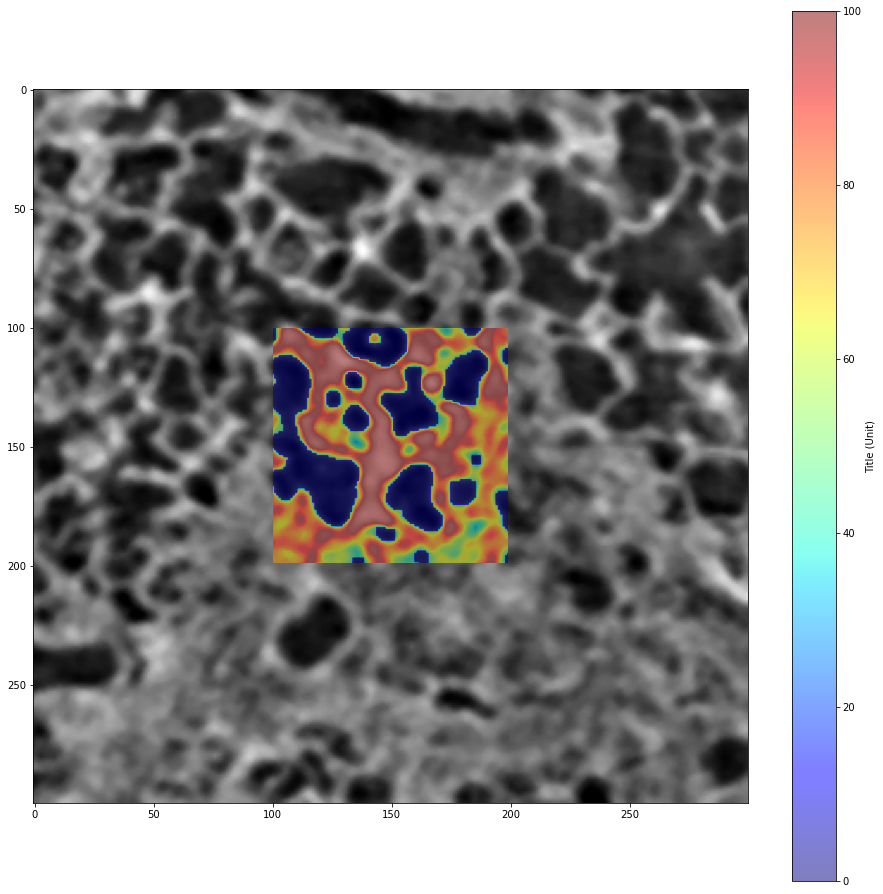

In [154]:
plt.figure(figsize=(16,16))

plt.imshow(bg, cmap='gray')#, alpha=0.5)
# cbar = plt.colorbar(orientation='horizontal')
# cbar.set_label('Title (Unit)')

plt.imshow(mt_mask, cmap='jet', alpha=0.5, vmax=100)
cbar = plt.colorbar()
cbar.set_label('Title (Unit)')

plt.show()

In [56]:
import cv2

In [57]:
rgba = cv2.cvtColor(vol[sliceNo, ...], cv2.COLOR_GRAY2RGBA)

In [58]:
rgba.shape

(300, 300, 4)

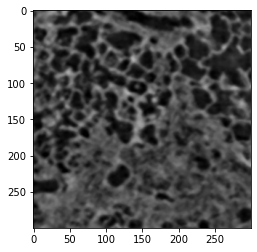

In [59]:
alpha = 

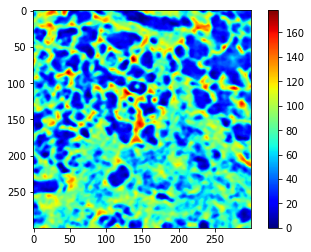

In [69]:
#h,w,c = tif.shape
tif = cv2.cvtColor(vol[sliceNo, ...], cv2.COLOR_GRAY2RGB)
alpha = vol[sliceNo, ...] 
rgba[:,:,3] = alpha  #  now you have an image whose alpha channel equals the greyscale values, 
#                        but I'm not sure what good that is

# # load a background image
img = cv2.cvtColor(mask*vol[sliceNo, ...], cv2.COLOR_GRAY2RGB)

# img = cv2.resize(img, (w,h))  #  for blending, both images need to be of same size
# # blend the two images, using the greyscale version of tif as alpha values
blend = cv2.add(
        alpha.reshape((*alpha.shape,1))/255.0*tif.astype(float),
        (1.0-alpha.reshape((*alpha.shape,1))/255.0)*img.astype(float),
        dtype=cv2.CV_8UC1)

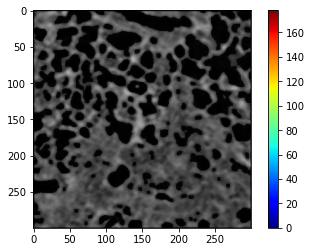

In [70]:
plt.imshow(blend, cmap='jet')
plt.colorbar()

In [73]:
from PIL import Image, ImageOps

In [88]:

img = mask*vol[sliceNo, ...]
img = Image.fromarray(img)
img = img.convert('RGBA')   # RGBA = RGB + alpha
mask = ImageOps.invert(img.convert('L'))    # 8-bit grey
img.putalpha(mask)

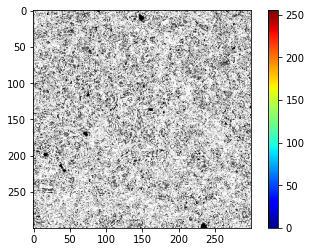

In [89]:
plt.imshow(img, cmap='jet')
plt.colorbar()

In [158]:
dis3d.max()

31.064449134018133

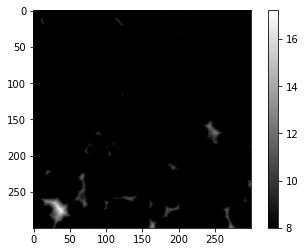

In [164]:
plt.imshow(dis3d[sliceNo, :, :], cmap=plt.cm.gray, vmin=8)
plt.colorbar()
plt.show()

In [163]:
dis3d[sliceNo, :, :].max()

17.204650534085253